$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $
## <font style="font-size:28px;" align="left"><b>Bilkent University</b></font><br>
<font style="font-size:24px;" align="left"><b>MATH 421 Introduction to Quantum Computation - Fall 2022</b></font><br>
<font style="font-size:20px;" align="left"><b>Qiskit Lecture 1 - Single Qubit Systems</b></font>

In [18]:
from qiskit import *
import numpy as np
from qiskit import Aer
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
from matplotlib import style 
from qiskit.circuit.library.standard_gates import *
style.use("dark_background")
simulator = Aer.get_backend("aer_simulator")
statevec_sim = Aer.get_backend("statevector_simulator")

<h2> Single qubit systems </h2>
We know that single qubit state can be represented as <br>
$$\ket{\psi} = \alpha\ket{0} + \beta\ket{1} = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} \in \mathbb{C}^2$$ where $|\alpha|^2 + |\beta|^2 = 1$ <br>
<br>

$$\ket{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad \ket{1} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

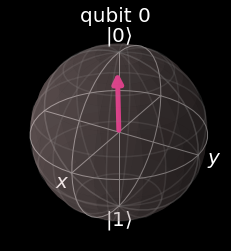

In [19]:
def random_state():
    alpha = 2*(np.random.rand(2)-0.5) + 1j*2*(np.random.rand(2)-0.5)
    alpha = alpha/np.linalg.norm(alpha)
    return alpha
    
plot_bloch_multivector(random_state())

<h2> X (NOT) Gate</h2>
Our first gate is the X gate which is the Pauli-X matrix:
$$ X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$
We should look at how it affects the our computational basis vectors, $\ket{0}$ and $\ket{1}$.
$$ $$
$$ X\ket{0} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \ket{1}$$ 
                       $$ $$  
$$ X\ket{1} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \ket{0}$$ 

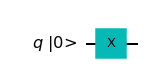

In [20]:
qcx = QuantumCircuit(1)
#qcx.initialize([0, 1])
qcx.x(0)
qcx.draw(output = 'mpl',initial_state= True)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


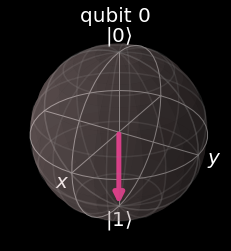

In [21]:
qcx.save_statevector()
qobjx = assemble(qcx)
state_x = simulator.run(qobjx).result().get_statevector()
print(state_x)
plot_bloch_multivector(state_x)

The eigenvectors of X Gate also forms a orthonormal basis for the Bloch Sphere which is calles as X-Basis. These vectors are denoted with $\ket{+}$ and $\ket{-}$ with eigenvalues of $\pm$ 1, respectively.
$$ \ket{+} = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1})$$
$$ $$ 
$$\ket{-} = \frac{1}{\sqrt{2}} (\ket{0} - \ket{1})$$

<h2> Y Gate</h2>
Our second single qubit gate is the Y gate, same as the Pauli-Y matrix.
$$ Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$
We should look at how it affects the our computational basis vectors, $\ket{0}$ and $\ket{1}$.
$$ $$
$$ Y\ket{0} = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ i \end{pmatrix} = i\ket{1}$$ 
                       $$ $$  
$$ Y\ket{1} = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} -i \\ 0 \end{pmatrix} = -i\ket{0}$$ 

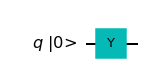

In [22]:
qcy = QuantumCircuit(1)
#qcy.initialize([0, 1])
qcy.y(0)
qcy.draw(output = 'mpl',initial_state= True)

Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


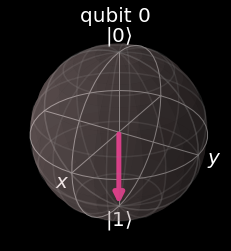

In [23]:
qcy.save_statevector()
qobjy = assemble(qcy)
state_y = simulator.run(qobjy).result().get_statevector()
print(state_y)
plot_bloch_multivector(state_y)

<h2> Z Gate</h2>
Our third single qubit gate is the Z gate, same as the Pauli-Z matrix.
$$ Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$
We should look at how it affects the our computational basis vectors, $\ket{0}$ and $\ket{1}$.
$$ $$
$$ Z\ket{0} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\0  \end{pmatrix} = \ket{0}$$ 
                       $$ $$  
$$ Z\ket{1} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ -1 \end{pmatrix} = -\ket{1}$$ 


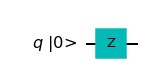

In [24]:
qcz= QuantumCircuit(1)
#qcz.initialize([0, 1])
qcz.z(0)
qcz.draw(output = 'mpl',initial_state= True)

Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


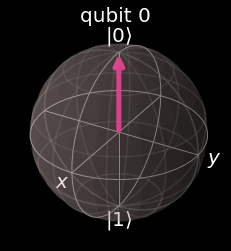

In [25]:
qcz.save_statevector()
qobjz = assemble(qcz)
state_z = simulator.run(qobjz).result().get_statevector()
print(state_z)
plot_bloch_multivector(state_z)

<h2>H (Hadamard) Gate</h2>
For now, we only see transforms between $\ket{0,1}$ to $\ket{0,1}$. So, how we can move between $\ket{0,1}$ to $\ket{+,-}$. The H-gate is used to create superposition states.
$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$
We should look at how it affects the our computational basis vectors, $\ket{0}$ and $\ket{1}$.
$$ $$
$$ H\ket{0} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}  \end{pmatrix} = \ket{+}$$ 
                       $$ $$  
$$ H\ket{1} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{pmatrix} = \ket{-}$$ 


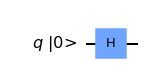

In [26]:
qch= QuantumCircuit(1)
#qch.initialize([0, 1])
qch.h(0)
qch.draw(output = 'mpl',initial_state= True)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


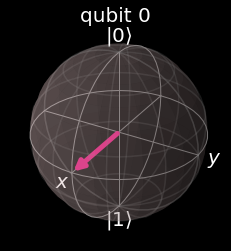

In [27]:
qch.save_statevector()
qobjh = assemble(qch)
state_h = simulator.run(qobjh).result().get_statevector()
print(state_h)
plot_bloch_multivector(state_h)

<h2>P (Phase) Gate</h2>
It is the gate that rotates the state on the Bloch sphere around the Z-axis with a given amount of $\phi$
$$ P(\phi)= \begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{pmatrix}$$
Note that when $\phi = \pi$, P gate is equivalent to a Z gate.

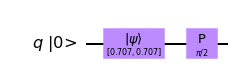

In [45]:
qcp= QuantumCircuit(1)
init_plus = [1/np.sqrt(2),1/np.sqrt(2)]
qcp.initialize(init_plus)
qcp.p(np.pi/2,0)
qcp.draw(output = 'mpl',initial_state= True)

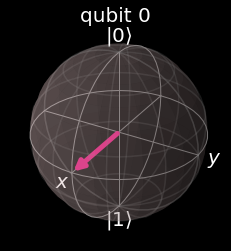

In [46]:
qcp.save_statevector()
qobjp = assemble(qcp)
state_p = simulator.run(qobjp).result().get_statevector()
plot_bloch_multivector(init_plus)

Statevector([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j],
            dims=(2,))


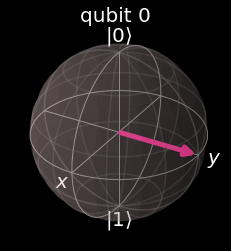

In [47]:
print(state_p)
plot_bloch_multivector(state_p)

<h2>S ($\sqrt{Z}$)Gate</h2>
It is a special case of P gate, where $\phi = \pi/2$, it is the square root of the Z gate. If one apply to S gates one after each other the effect on the state will be same as applying a Z gate.
$$ S= \begin{pmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{pmatrix}$$
One important note that, unlike the other gates that we discussed, the inverse of the S gate is not itself. It is called S-dagger.

In [ ]:
qcs = QuantumCircuit(1)
qcs.s(0)  
qcs.sdg(0) 
qcs.draw(output = 'mpl',initial_state= True)

<h2>T Gate</h2>
It is again a special case of P gate, where $\phi = \pi/4$, it is the fourth root of the Z gate.
$$ T = \begin{pmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{pmatrix}$$


In [ ]:
qct = QuantumCircuit(1)
qct.t(0)
qct.tdg(0)
qcs.draw(output = 'mpl',initial_state= True)

<h2>U Gate</h2>
As we see, Z, S, and T gates are just special cases of the P gate. There is another level of abstraction that we can represent any operation in Bloch Sphere or a Quantum Circuit by using an Unitary gate. In the lectures you will see this as Solovay-Kitaev Theorem.
We will use qc.u($\theta$, $\phi$, $\lambda$) function which creates the following unitary gate:
$$ U(\theta, \phi, \lambda) = \begin{pmatrix} \cos(\frac{\theta}{2}) & e^{-i\lambda}\sin(\frac{\theta}{2}) \\ e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2}) \end{pmatrix}$$
On the other hand Nielsen and Chuang uses a 4 parameter description with $\alpha$, $\beta$, $\gamma$, $\delta$:
$$ U = e^{i\alpha} \begin{pmatrix} e^{-i\beta/2} & 0 \\ 0 & e^{i\beta/2} \end{pmatrix} \begin{pmatrix} \cos(\frac{\gamma}{2}) & -\sin(\frac{\gamma}{2}) \\ \sin(\frac{\gamma}{2}) & \cos(\frac{\gamma}{2}) \end{pmatrix} \begin{pmatrix} e^{-i\delta/2} & 0 \\ 0 & e^{i\delta/2} \end{pmatrix}$$
$$ $$
One can show that $U(\pi/2, 0,\pi) = H$, and similarly $U(0,0,\lambda) = P$.

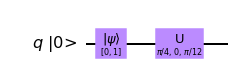

In [53]:
qcu = QuantumCircuit(1)
qcu.initialize([0,1])
qcu.u(np.pi/4,0,np.pi/12,0)  
qcu.draw(output = 'mpl',initial_state= True)

Statevector([-0.36964381-0.09904576j,  0.8923991 +0.23911762j],
            dims=(2,))


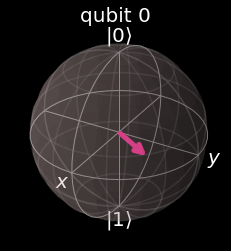

In [54]:
qcu.save_statevector()
qobju = assemble(qcu)
state_u = simulator.run(qobju).result().get_statevector()
print(state_u)
plot_bloch_multivector(state_u)